In [47]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Text(0, 0.5, 'DENSITY')

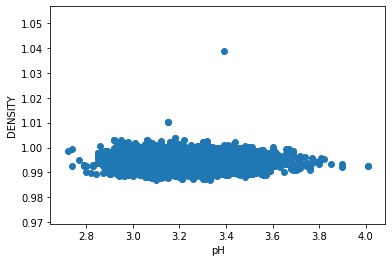

In [54]:
plt.scatter(data['pH'] , data['density'])
plt.xlabel("pH")
plt.ylabel("DENSITY")

### Checking for null values

In [4]:
data.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

#### Filling the missing values with mean

In [5]:
data = data.fillna(data.mean())

### Standardize the Variables

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
temp = data.drop(['type' , 'quality'] , axis = 1)
temp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(temp)

In [9]:
scaled_data = pd.DataFrame(scaled , columns = temp.columns)
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.167159,-0.423564,0.284245,3.206977,-0.315222,0.815565,0.959976,2.102214,-1.359665,-0.545959,-1.418558
1,-0.707427,-0.241232,0.146523,-0.808136,-0.201027,-0.931107,0.287618,-0.232332,0.508045,-0.277064,-0.831615
2,0.681835,-0.362786,0.559689,0.306005,-0.172479,-0.029599,-0.331660,0.134525,0.259017,-0.613183,-0.328521
3,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-0.882078,-0.496219
4,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-0.882078,-0.496219


### Splitting the data

In [10]:
label = data['quality']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data , label , test_size=0.2)

In [27]:
print('Shape(X_train) : ' , x_train.shape)
print('Shape(y_train) : ' , y_train.shape)
print('Shape(X_test) : ' , x_test .shape)
print('Shape(y_test) : ' , y_test.shape)

Shape(X_train) :  (5197, 11)
Shape(y_train) :  (5197,)
Shape(X_test) :  (1300, 11)
Shape(y_test) :  (1300,)


### Different Models

### Random Forest

In [13]:
model_1 = RandomForestClassifier(max_depth=3 , random_state = 0)
model_1.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [14]:
y_pred_1 = model_1.predict(x_test)
y_pred_1

array([5, 5, 6, ..., 6, 6, 6], dtype=int64)

### Linear Regression

In [15]:
model_2 = LinearRegression()
model_2.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred_2 = model_2.predict(x_test)
y_pred_2

array([5.39660549, 4.45891766, 7.11889384, ..., 6.99774094, 5.88609812,
       6.14351772])

### K Neighbors Classifier

In [17]:
model_3 = KNeighborsClassifier(n_neighbors=2)
model_3.fit(x_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [18]:
y_pred_3 = model_3.predict(x_test)
y_pred_3

array([5, 5, 6, ..., 7, 6, 6], dtype=int64)

## Support Vector Machine

In [28]:
model_4 = SVC()
model_4.fit(x_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
y_pred_4 = model_4.predict(x_test)
y_pred_4

array([6, 5, 7, ..., 7, 6, 6], dtype=int64)

### Gaussian Naive Bayes

In [44]:
model_5 = GaussianNB()
model_5.fit(x_train , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
y_pred_5 = model_5.predict(x_test)
y_pred_5

array([5, 5, 7, ..., 7, 6, 5], dtype=int64)

### ACCURACY OF DIFFERENT MODDELS

In [19]:
from sklearn.metrics import accuracy_score

In [46]:
print('Random Forest Classifier : ' , accuracy_score(y_test , y_pred_1))

print('Linear Regression : ' , accuracy_score(y_test , np.round(y_pred_2)))

print('K Neighbor Classifier : ' , accuracy_score(y_test , y_pred_3))

print('Support Vector Machine : ' , accuracy_score(y_test , y_pred_4))

print('Gaussian NB : ' , accuracy_score(y_test , y_pred_5))

Random Forest Classifier :  0.5223076923076924
Linear Regression :  0.5215384615384615
K Neighbor Classifier :  0.5792307692307692
Support Vector Machine :  0.5784615384615385
Gaussian NB :  0.4430769230769231
